In [1]:
! unzip -qq "../input/dogs-vs-cats/test1.zip"
! unzip -qq "../input/dogs-vs-cats/train.zip"

# Some pictures

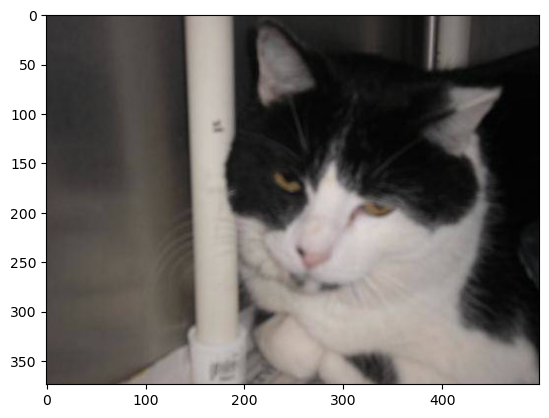

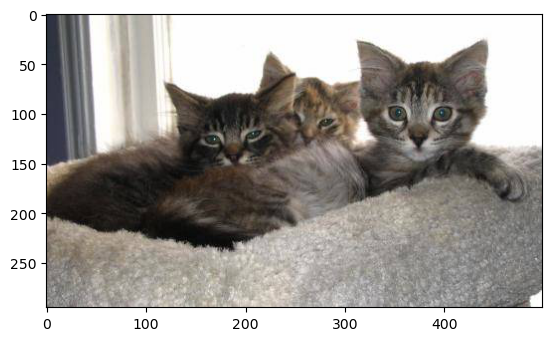

<Figure size 640x480 with 0 Axes>

In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
filenames = os.listdir('./train/')

for i in range(2):
    picture = np.array(plt.imread(os.path.join('./train',random.choice(filenames))))
    plt.imshow(picture)
    plt.show()
    plt.figure()


# Create a dataframe

In [4]:
from glob import glob
import pandas as pd

file_names = glob('./train/*.jpg')
categories = [1 if 'dog' in pic else 0 for pic in os.listdir("./train")]

df = pd.DataFrame({'filename': file_names, 'category':categories})
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

print("shape:", df.shape)
df.head()


shape: (25000, 2)


filename category
0  ./train/cat.1312.jpg      cat
1  ./train/dog.2828.jpg      dog
2   ./train/dog.973.jpg      dog
3  ./train/dog.9234.jpg      dog
4  ./train/dog.7813.jpg      dog

# Number of cats and dogs in the train dataset

Number of dogs in the train dataset: 12500
Number of cats in the train dataset: 12500


<AxesSubplot:xlabel='category', ylabel='Count'>

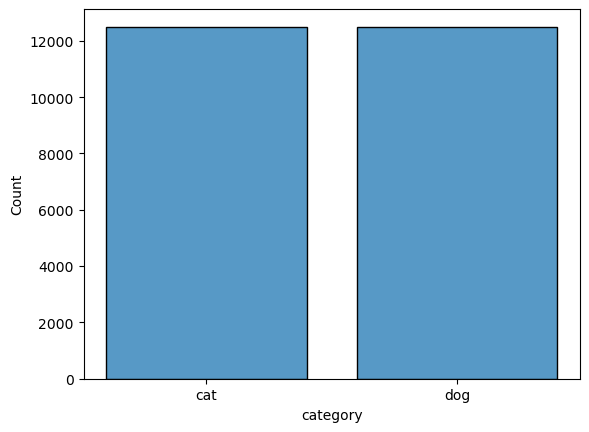

In [5]:
import seaborn as sns
print('Number of dogs in the train dataset:',df.category[df.category=='dog'].count())
print('Number of cats in the train dataset:',df.category[df.category=='cat'].count())
sns.histplot(data=df, x="category", shrink=0.8)

# Split data to train and validate 

In [6]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df, test_size=0.2, random_state=10)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
validate_df.head(10)

filename category
0   ./train/cat.3554.jpg      cat
1  ./train/cat.12460.jpg      cat
2   ./train/cat.9155.jpg      cat
3   ./train/cat.8337.jpg      cat
4   ./train/dog.7268.jpg      dog
5   ./train/cat.4896.jpg      cat
6   ./train/dog.6567.jpg      dog
7   ./train/dog.8223.jpg      dog
8   ./train/dog.2467.jpg      dog
9  ./train/cat.11595.jpg      cat

# Images preprocessing

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
train_df,x_col='filename',
y_col='category',
target_size=(128,128),
batch_size=512,
class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
validate_df,x_col='filename',
y_col='category',
target_size=(128,128),
batch_size=512,
class_mode='binary'
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Model

In [8]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
       Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
       MaxPool2D((2,2)),
       Conv2D(32, (3,3), activation='relu'),
       MaxPool2D((2,2)),
       Conv2D(64, (3,3), activation='relu'),
       MaxPool2D((2,2)),
       Flatten(),
       Dense(512, activation='relu'),
       Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [10]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 264s 6s/step - loss: 0.7384 - accuracy: 0.5291 - val_loss: 0.6692 - val_accuracy: 0.5788
Epoch 2/10
40/40 [==============================] - 260s 6s/step - loss: 0.6396 - accuracy: 0.6384 - val_loss: 0.6638 - val_accuracy: 0.6114
Epoch 3/10
40/40 [==============================] - 261s 6s/step - loss: 0.5883 - accuracy: 0.6927 - val_loss: 0.5585 - val_accuracy: 0.7188
Epoch 4/10
40/40 [==============================] - 261s 6s/step - loss: 0.5522 - accuracy: 0.7175 - val_loss: 0.5151 - val_accuracy: 0.7380
Epoch 5/10
40/40 [==============================] - 260s 6s/step - loss: 0.5187 - accuracy: 0.7421 - val_loss: 0.5637 - val_accuracy: 0.7022
Epoch 6/10
40/40 [==============================] - 260s 6s/step - loss: 0.5163 - accuracy: 0.7402 - val_loss: 0.4804 - val_accuracy: 0.7594
Epoch 7/10
40/40 [==============================] - 260s 6s/step - loss: 0.4817 - accuracy: 0.7703 - val_loss: 0.4686 - val_accuracy: 0.7708
Epoch 8/10
40

# Accuracy visualization

<Figure size 640x480 with 0 Axes>

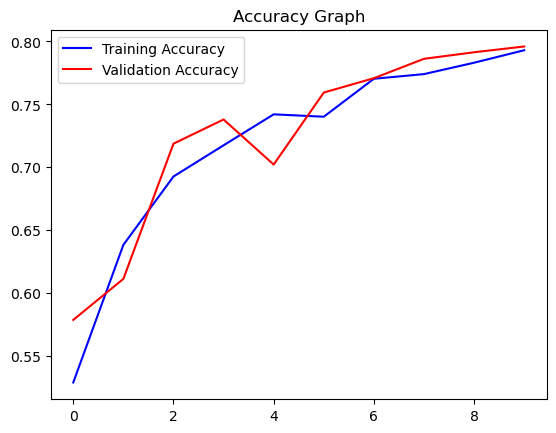

<Figure size 640x480 with 0 Axes>

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

**Highest training accuracy was 79.30**

**Highest validation accuracy was 79.60**


# Test

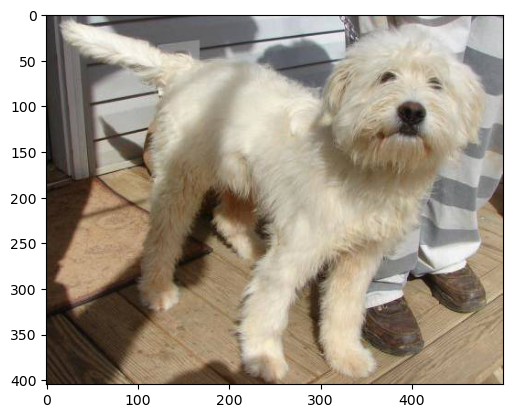

1/1 [==============================] - 0s 137ms/step
Dog


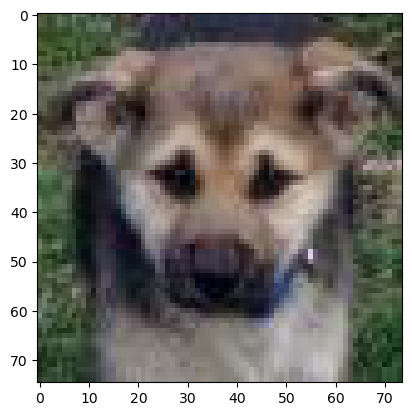

1/1 [==============================] - 0s 29ms/step
Dog


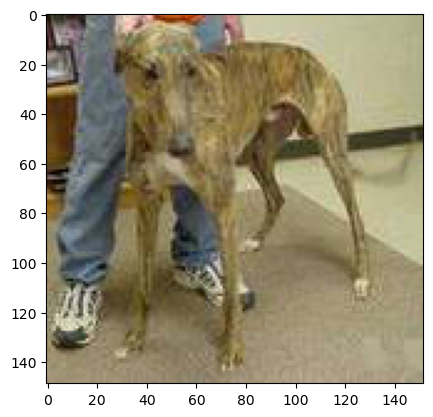

1/1 [==============================] - 0s 29ms/step
Dog


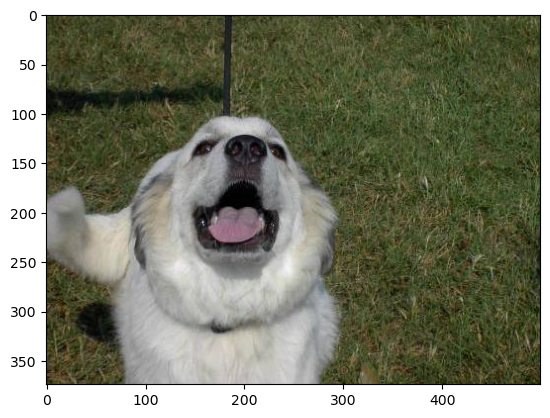

1/1 [==============================] - 0s 29ms/step
Dog


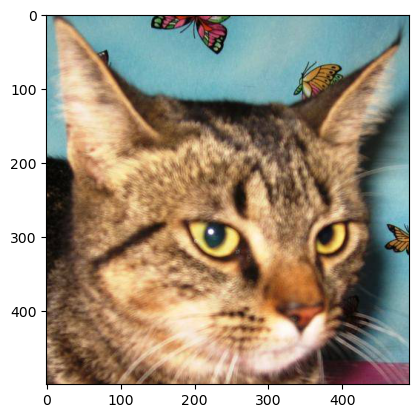

1/1 [==============================] - 0s 30ms/step
Cat


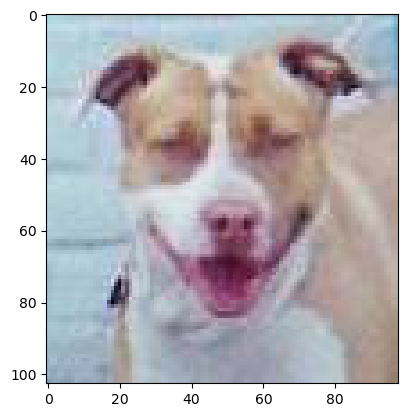

1/1 [==============================] - 0s 29ms/step
Dog


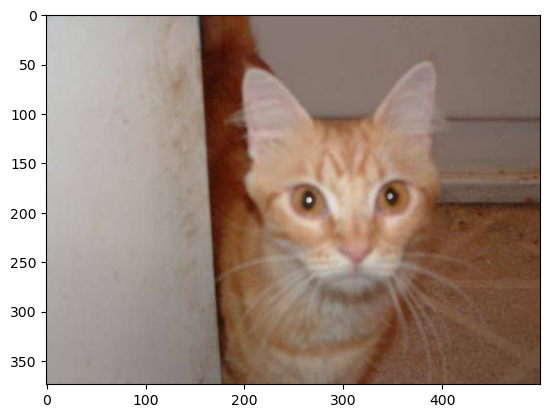

1/1 [==============================] - 0s 29ms/step
Dog


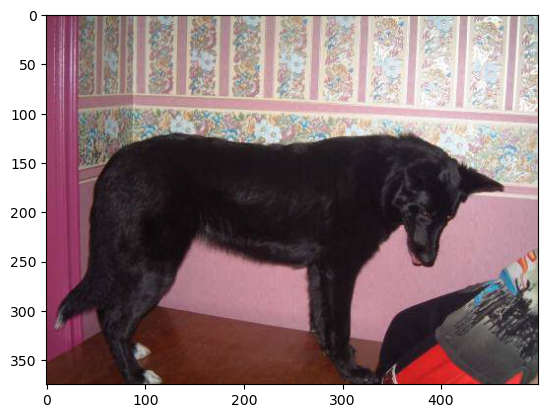

1/1 [==============================] - 0s 30ms/step
Dog


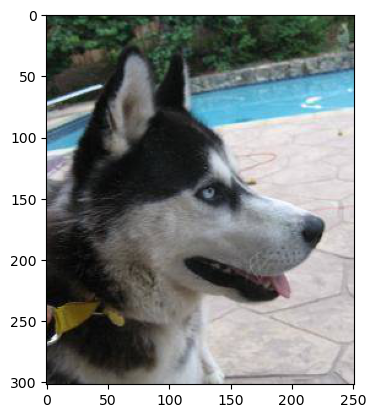

1/1 [==============================] - 0s 30ms/step
Cat


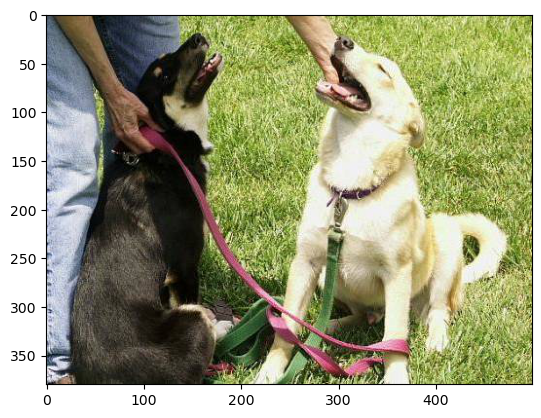

1/1 [==============================] - 0s 28ms/step
Dog


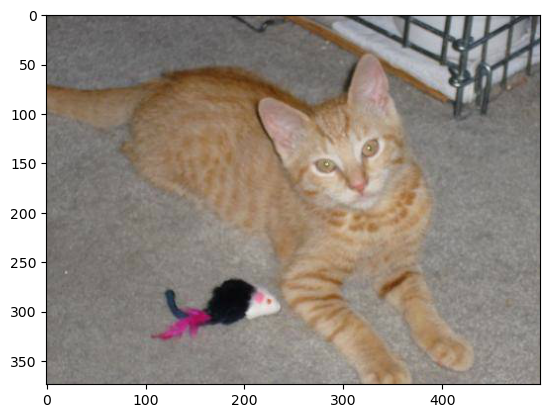

1/1 [==============================] - 0s 29ms/step
Dog


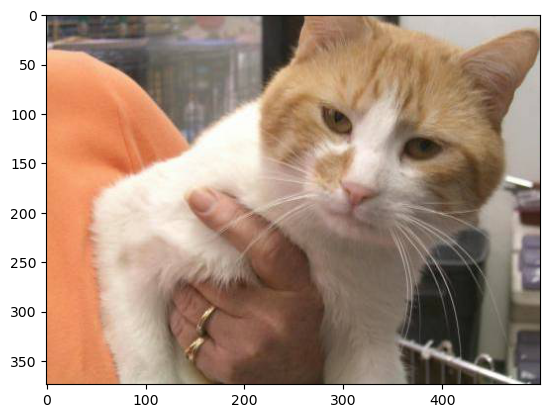

1/1 [==============================] - 0s 31ms/step
Cat


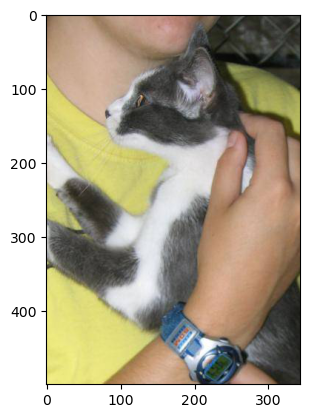

1/1 [==============================] - 0s 29ms/step
Cat


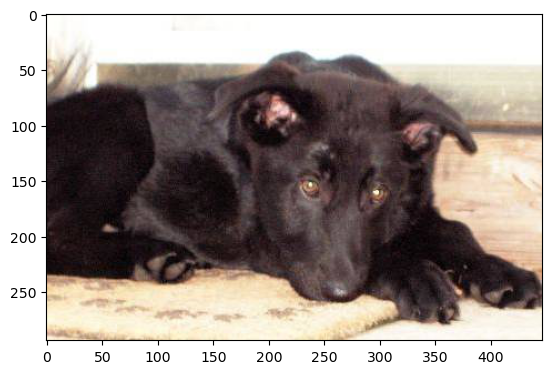

1/1 [==============================] - 0s 29ms/step
Cat


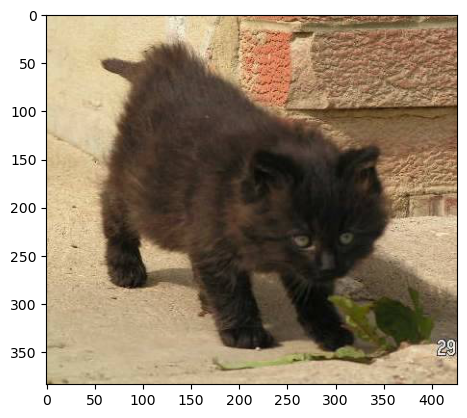

1/1 [==============================] - 0s 29ms/step
Dog


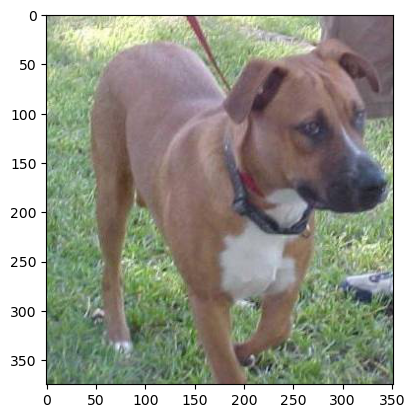

1/1 [==============================] - 0s 27ms/step
Dog


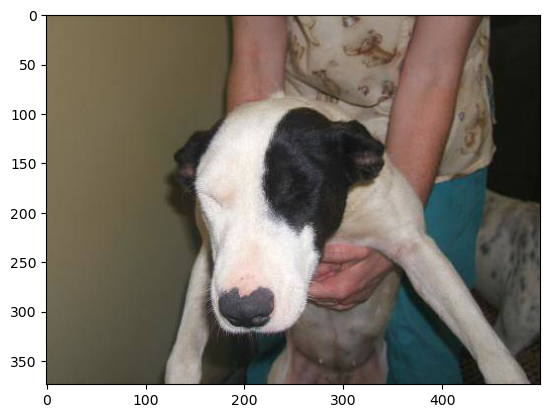

1/1 [==============================] - 0s 28ms/step
Dog


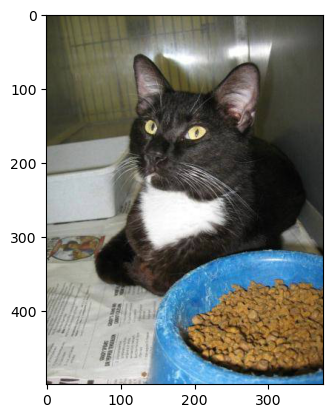

1/1 [==============================] - 0s 29ms/step
Cat


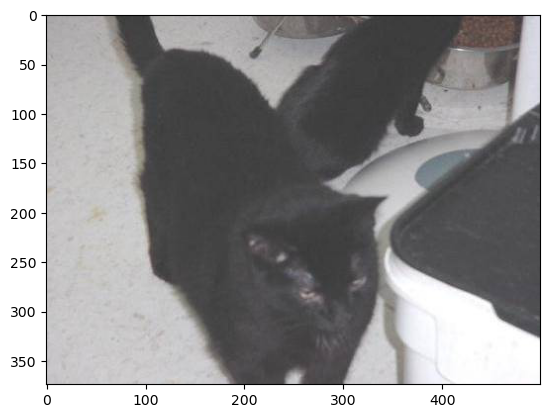

1/1 [==============================] - 0s 28ms/step
Cat


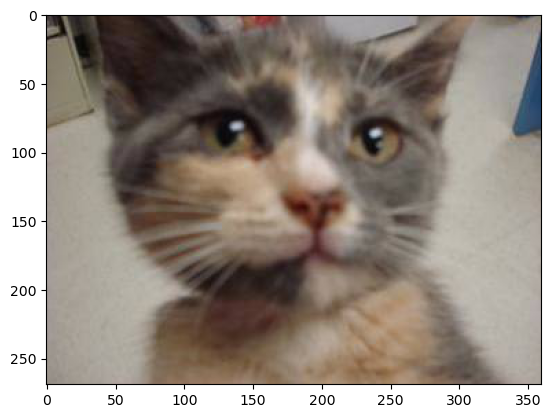

1/1 [==============================] - 0s 30ms/step
Dog


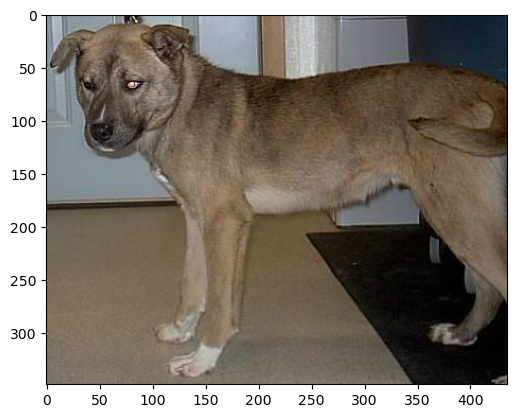

1/1 [==============================] - 0s 28ms/step
Cat


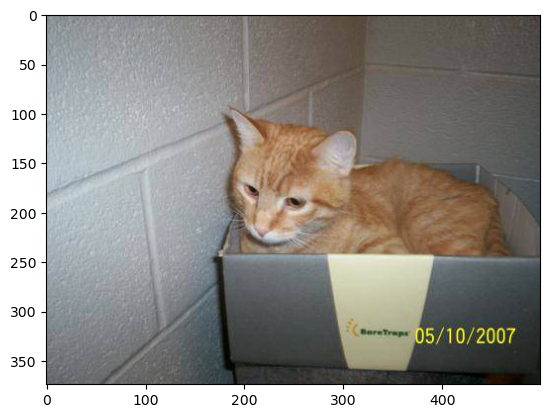

1/1 [==============================] - 0s 30ms/step
Dog


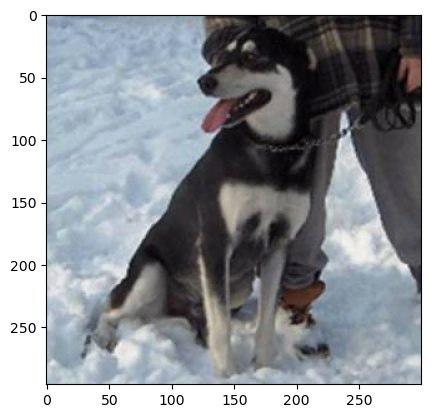

1/1 [==============================] - 0s 30ms/step
Dog


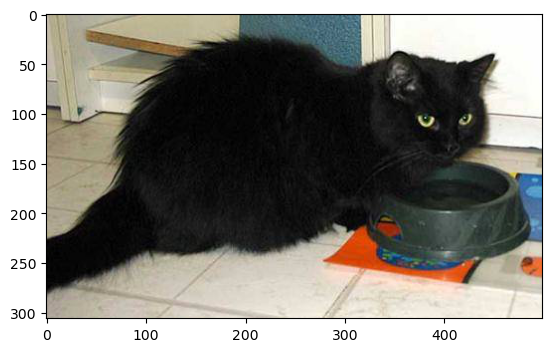

1/1 [==============================] - 0s 28ms/step
Cat


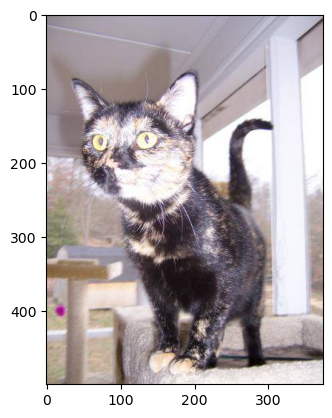

1/1 [==============================] - 0s 29ms/step
Cat


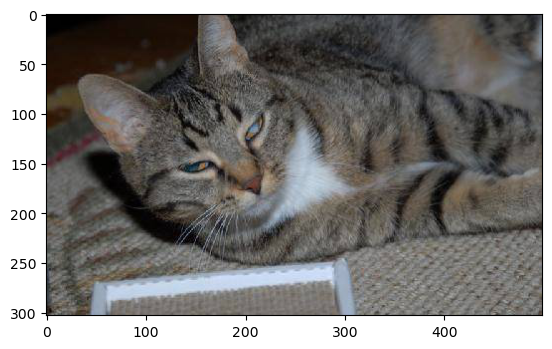

1/1 [==============================] - 0s 29ms/step
Cat


<Figure size 640x480 with 0 Axes>

In [12]:
from tensorflow.keras.utils import load_img
filenames = os.listdir('./test1/')
for i in filenames[200:226]:
    image_path = "test1/" + i
    img = load_img(image_path, target_size=(128, 128))
    img = np.array(img)
    img = img / 255.0
    img = img.reshape(1, 128, 128, 3)

    picture = np.array(plt.imread((image_path)))
    plt.imshow(picture)
    plt.show()
    plt.figure()

    pred = model.predict(img)
    if pred[0] > 0.5:
        label = 'Dog'
    else:
        label = 'Cat'
    print(label)